# <strong>Individual Lab 2</strong>
<strong><em>YÊU CẦU:</em></strong> Xây dựng mô hình CNN để phân loại hình ảnh chữ số viết tay và đào tạo mô hình đó trên bộ dữ liệu MNIST. MNIST bao gồm 60.000 ảnh, mỗi ảnh là một hình ảnh chữ số viết tay. 
<p>Chương trình được triển khai bằng Python và Keras.</p>

### Bước 1: Thêm các thư viện cần thiết
<em>Lưu ý: Nếu chưa cài đặt thư viện vào máy ta có thể sử dụng lệnh pip install + tên thư viện cần cài đặt</em>

In [1]:
#1 Thêm thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras import backend as K 
from keras.datasets import mnist

### Bước 2: Load dữ liệu MNIST 
<p>Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. </p>
Cơ sở dữ liệu MNIST là một cơ sở dữ liệu lớn chứa các chữ số viết tay thường được dùng trong việc huấn luyện các hệ thống xử lý hình ảnh khác nhau.

In [2]:
#2 Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train shape:', X_train.shape)
#print('validation:', X_val.shape[0])
print('Train samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0], )
print('Image shape:', X_train[0].shape)

Train shape: (60000, 28, 28)
Train samples: 60000
Test samples: 10000
Image shape: (28, 28)


### Bước 3: Reshape và chuẩn hóa dữ liệu
<p>Dữ liệu input cho mô hình CNN (convolutional neural network) là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên cần reshape lại thành kích thước N * 28 * 28 * 1 để giống kích thước mà keras yêu cầu.</p> 
<p>Và vì mạng hoạt động tốt hơn với dữ liệu được chia tỉ lệ hoặc chuẩn hóa nên tiến hành chuyển đổi các giá trị pixel thành giá trị nằm trong khoảng từ 0 đến 1 bằng cách chia từng giá trị ô riêng lẻ cho 255</p>

In [3]:
#3 Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Chuẩn hóa về về khoảng [0,1] 
X_train = X_train/255
#X_val = X_val/255
X_test = X_test/255 


### Bước 4: One hot encoding label Y
<p>Chuyển đổi one-hot encoding label Y của ảnh. </p>
<p>VD: Số 5 thành vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]</p>



In [4]:
#4 One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
#Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)

print('y lúc đầu ', y_train[0])
print('y sau khi one-hot encoding ',Y_train[0])

y lúc đầu  5
y sau khi one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Bước 5: Định nghĩa model

<p>1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> CONV -> POOL -> DO -> FLATTEN -> FC -> OUTPUT</p>
<p>2. Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)</p>
<p>3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))</p>
<p>4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))</p>
<p>5. Thêm Dropout layer để giảm overfitting</p>
<p>6. Để chuyển từ tensor sang vector chỉ cần thêm flatten layer.</p>
<p>7. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))</p>


In [5]:
#5 Định nghĩa model

model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm relu làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Thêm DO có giá trị 0.25
model.add(Dropout(0.25))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm relu
model.add(Dense(128, activation='relu'))

# Thêm DO có giá trị 0.5
model.add(Dropout(0.5)) 

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Bước 6: Compile model
Ở đây ta sử dụng 'categorical_crossentropy' làm hàm mất mát, 'adam' để tối ưu và 'accuracy' làm thước đo.

In [6]:
#6 Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Bước 7: Huấn luyện mô hình với dữ liệu
Ở đây ta dùng 64 mẫu dữ liệu cho 1 lần huấn luyện (batch_size = 64), huấn luyện 10 lần toàn dữ liệu (epochs = 10)

In [7]:

#7 Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=64, epochs=10, verbose=1)

Epoch 1/10
938/938 [==============================] - 31s 33ms/step - loss: 0.1941 - accuracy: 0.9411 - val_loss: 0.0430 - val_accuracy: 0.9861
Epoch 2/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 3/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0361 - val_accuracy: 0.9883
Epoch 4/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 5/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0271 - val_accuracy: 0.9921
Epoch 7/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0299 - val_accuracy:

### Bước 8: Đánh giá mô hình
Dùng kết quả đánh giá cuối cùng của mode với test set. Kết quả ở đây mô hình dự đoán chữ số có độ chính xác là 99,3% (dự đoán khoảng 100 ảnh thì sai 1 ảnh)

In [8]:
#8 Đánh giá mô hình 
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.032421037554740906
Test accuracy: 0.9915000200271606


### Bước 9: Vẽ đồ thị loss, accuracy của traning set và validation set
Ở đồ thị 1 ta vẽ chung accuracy và loss. Còn 2 đồ thị sau vẽ riêng ra để ta nhìn chi tiết hơn dễ so sánh.

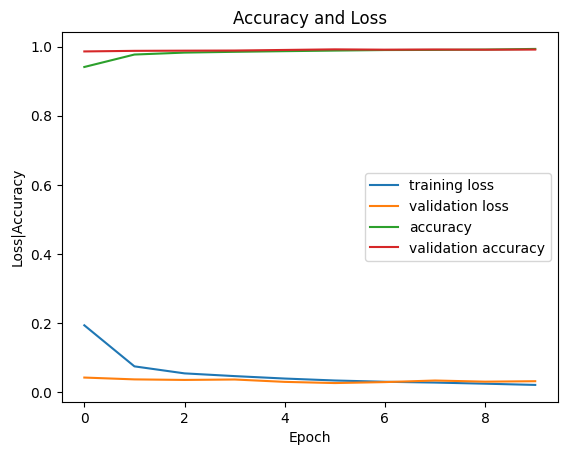

In [9]:

#9 Vẽ đồ thị loss, accuracy của traning set và validation set
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.plot(H.history['loss'], label='training loss')
plt.plot(H.history['val_loss'], label='validation loss')
plt.plot(H.history['accuracy'], label='accuracy')
plt.plot(H.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


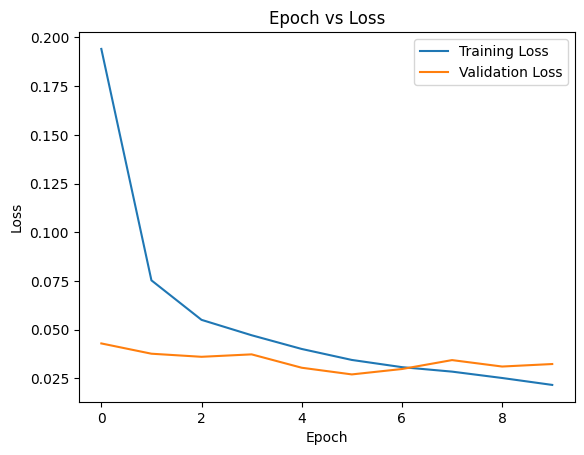

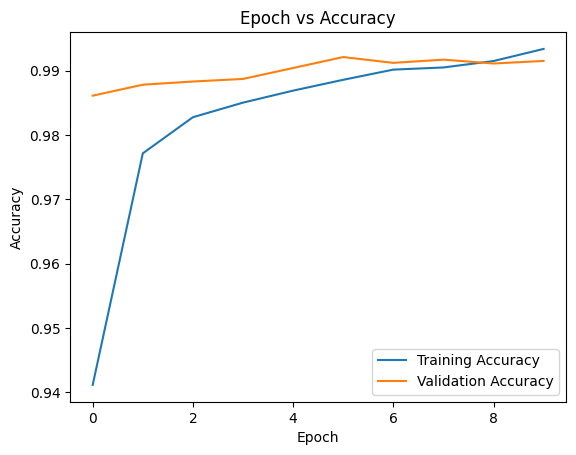

In [10]:
# Vẽ đồ thị loss, accuracy của traning set và validation set chi tiết hơn

plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(H.history['loss'], label = 'Training Loss')
plt.plot(H.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

plt.title("Epoch vs Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(H.history['accuracy'], label = 'Training Accuracy')
plt.plot(H.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## Bước 10: Chạy thử mô hình với tập dữ liệu test 
<p>Đầu tiên, chạy thử với 1 ảnh của tập test và xuất kết quả dự đoán.</p> 
<p>Sau đó chạy trên toàn bộ tập test lưu lại kết quả. Xuất ngẫu nhiên 10 kết quả được lưu lại sau khi chạy.</p>

1/1 [==============================] - 0s 75ms/step
Predicted label:  7


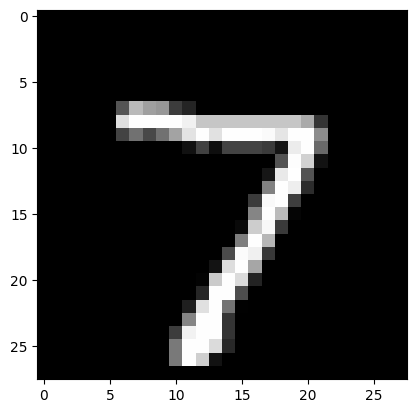

In [11]:
#10 Dự đoán ảnh
# Dự đoán thử ảnh 1
# Ở đây ta dự đoán ảnh đầu tiên của tập X_test. Có thể thay ảnh khác ví dụ X_test[69]
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Predicted label: ', np.argmax(y_predict))

In [12]:
# Dự đoán với tập ảnh test và lưu lại kết quả dự đoán
pred = model.predict(X_test) 
predlabel = np.argmax(pred, axis = 1)

label = np.argmax(Y_test, axis = -1)

#print(predlabel) 
#print(label)

313/313 [==============================] - 2s 5ms/step


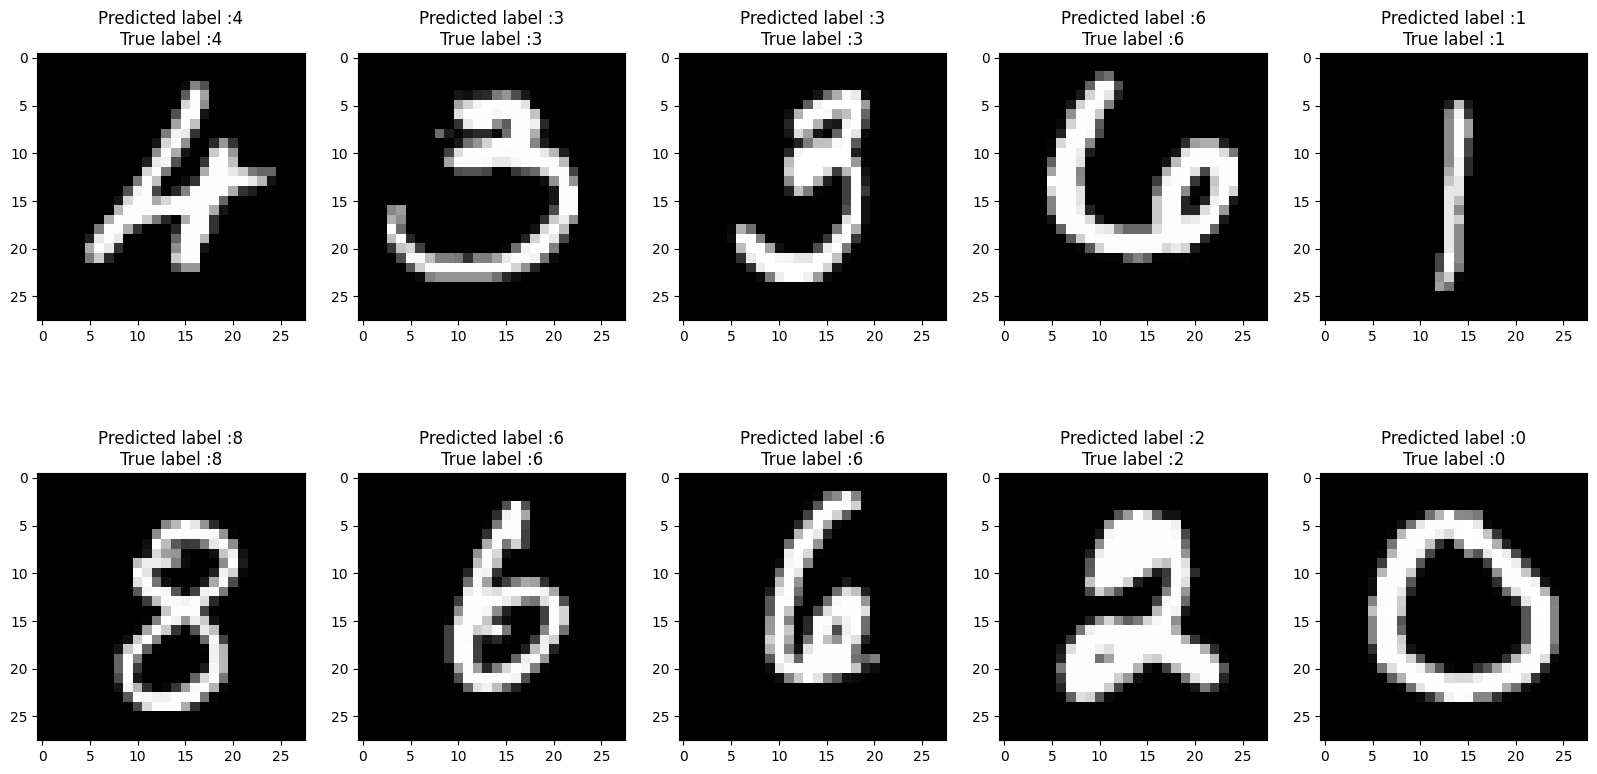

In [13]:
# Hiển thị ngẫu nhiên các kết quả đã dự đoán

nrows = 2
ncols = 5
# tổng số lượng kết quả hiện thị (ở đây là 2*5 = 10)
n = nrows * ncols

# Chọn ngẫu nhiên n = 10 kết quả để xuất ra
random = np.random.choice(range(len(X_test)),size = n, replace = False) 
X_random = X_test[random]
label_random = label[random]
predlabel_random = predlabel[random]

# Xuất ảnh, kết quả nhãn dự đoán và nhãn đúng của nó 
i = 0
# nếu tăng số lượng dòng, cột lên thì dựa theo số lượng ảnh để figsize lại cho đẹp
fig, ax = plt.subplots(nrows,ncols,figsize=(20, 10))
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow((X_random[i]).reshape((28,28)), cmap='gray')
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(predlabel_random[i],label_random[i]))
        i += 1